In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Chapter 12 - Qiskit Aqua

In [2]:
from qiskit.aqua.components.initial_states import Custom
init_state_0 = Custom(num_qubits=3, state='zero')
init_state_uniform = Custom(num_qubits=3, state='uniform')
init_state_random = Custom(num_qubits=3, state='random')


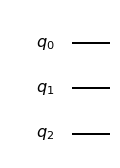

In [3]:
qc0 = init_state_0.construct_circuit(mode='circuit')
qc0.draw()


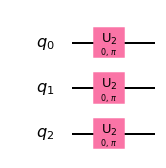

In [4]:
qc1 = init_state_uniform.construct_circuit(mode='circuit')
qc1.draw()


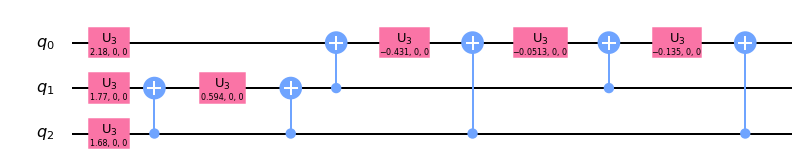

In [5]:
qc2 = init_state_random.construct_circuit(mode='circuit')
qc2.draw()


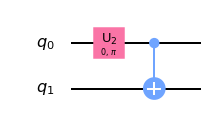

In [6]:
# Create the quantum circuit
num_qubits = 2
qc = QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0,1)
# Construct the Custom class based on the built quantum circuit
q_component = Custom(num_qubits=num_qubits, circuit=qc)
q_component.construct_circuit().draw()


In [7]:
# Import and create the PyTorchDiscriminator class
from qiskit.aqua.components.neural_networks import PyTorchDiscriminator
# Set the number data input and output dimension to 2.
py_torch_disc = PyTorchDiscriminator(n_features = 2, n_out=2)


In [ ]:
# Load the discriminator model, implements the torch.load(dir) 
discriminator_model = '/discriminator_model_directory'
py_torch_disc.load_model(discriminator_model)


In [8]:
# Parameters are defined in the Qiskit API as follows: 
###
# data (tuple) – real_batch: torch.Tensor, Training data batch. generated_batch: numpy array, Generated data batch.
# weights (tuple) – real problem, generated problem
# penalty (bool) – Indicate whether or not penalty function is applied to the loss function.
# quantum_instance (QuantumInstance) – Quantum Instance (depreciated)
# shots (int) – Number of shots for hardware or qasm execution. Not used for classical network (only quantum ones)
###
result_dict = PyTorchDiscriminator.train(data, weights, penalty, quantum_instance=quantum_instance, shots=None)


In [9]:
# Import the CircuitStateFn class
from qiskit.aqua.operators.state_fns import CircuitStateFn
# Create the quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)


In [10]:
# Create the CircuitStateFn class with the quantum circuit
csf = CircuitStateFn(primitive=qc, coeff=1, is_measurement=False)
print(csf)


CircuitStateFn(
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
)


In [11]:
# Create a second quantum circuit with same width and operators
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.cx(0,1)

# Create the second circuit state function
csf2 = CircuitStateFn(primitive=qc2, coeff=1, is_measurement=False)

# Compare both circuit state functions using the equals operator
print(csf.equals(csf2))


True


In [12]:
# Add the two circuit state functions together
added_csf = csf.add(csf2)
print(added_csf)


CircuitStateFn(
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
) * 2


In [13]:
# Create a quantum circuit
qc3 = QuantumCircuit(2) 
qc3.h(0)
qc3.cx(1,0) 
# Create a circuit state function from the quantum circuit
csf3 = CircuitStateFn(primitive=qc3, coeff=1, is_measurement=False)
print(added_csf.add(csf3))


SummedOp([
  CircuitStateFn(
       ┌───┐     
  q_0: ┤ H ├──■──
       └───┘┌─┴─┐
  q_1: ─────┤ X ├
            └───┘
  ) * 2,
  CircuitStateFn(
       ┌───┐┌───┐
  q_0: ┤ H ├┤ X ├
       └───┘└─┬─┘
  q_1: ───────■──
                 
  )
])


In [14]:
# Import the utils module
from qiskit.aqua import utils 
# convert the number 6 from decimal to binary
binary_value = utils.decimal_to_binary(6, max_num_digits=0)
print('Binary result: ', binary_value)


Binary result:  110.


In [15]:
#Random Unitary matrix
random_unitary = utils.random_unitary(N=3)
print('Random Unitary result: \n', random_unitary)


Random Unitary result: 
 [[ 0.62908478+0.34714688j -0.2728722 -0.46236552j -0.06999293+0.43657905j]
 [ 0.62861687+0.17592649j  0.22322343+0.20435486j -0.0264057 -0.69397683j]
 [ 0.23669704+0.04008236j  0.56588394+0.54767203j  0.03572391+0.56650016j]]


In [16]:
# Create an array of random quantum circuits
from qiskit.circuit.random import random_circuit
quantum_circuits = []
# Append a group of random circuits
for x in range(2):
    quantum_circuits.append(random_circuit(3, 5, measure=True))


In [17]:
# Obtain and print a summary of all the quantum circuits
circuits_summary = utils.summarize_circuits(quantum_circuits)
print(circuits_summary)


Submitting 2 circuits.
0-th circuit: 3 qubits, 3 classical bits and 11 operations with depth 6
op_counts: OrderedDict([('measure', 3), ('cswap', 2), ('cz', 1), ('ry', 1), ('id', 1), ('t', 1), ('h', 1), ('ccx', 1)])
1-th circuit: 3 qubits, 3 classical bits and 9 operations with depth 6
op_counts: OrderedDict([('measure', 3), ('cswap', 2), ('ccx', 2), ('crz', 1), ('u1', 1)])
Average: 3.00 qubits, 3.00 classical bits and 10.00 operations with depth 6.00



In [18]:
# Fully entangled coupling map
full_coupling_map = utils.get_entangler_map(map_type="full", num_qubits=5)
print('Full coupling map: ', full_coupling_map) 


Full coupling map:  [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


In [19]:
# Linearly entangled coupling map
lin_coupling_map = utils.get_entangler_map(map_type="linear", num_qubits=5)
print('Full coupling map: ', lin_coupling_map)


Full coupling map:  [[0, 1], [1, 2], [2, 3], [3, 4]]


In [20]:
# Validate entangled coupling maps
result = utils.validate_entangler_map(entangler_map=full_coupling_map, num_qubits=5, allow_double_entanglement=True)
print(result)


[[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


In [21]:
# Import NumPy to create the array
import numpy as np

# Generate a 2x3 (NxD) array
dim_map = np.array( [[ 0,1,0], [ 1,0,1]])
# Reduce the D from 3 to 2, resulting in a 2x2 dimensional array
reduced_dim = utils.reduce_dim_to_via_pca(x=dim_map, dim=2)
print(reduced_dim)


[[ 8.66025404e-01  3.92523115e-17]
 [-8.66025404e-01  3.92523115e-17]]


In [22]:
# Import the necessary modules and classes
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover, DeutschJozsa, BernsteinVazirani, Simon
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle, CustomCircuitOracle

# State the SAT problem into a logical expression
# A = Sophia, B = Angelina, C = Leo, D = Lex
expression = '((A ^ B) & (C & D) & ~(A & C))'


In [23]:
# Create an Oracle based on the Logical Expression
oracle = LogicalExpressionOracle(expression)


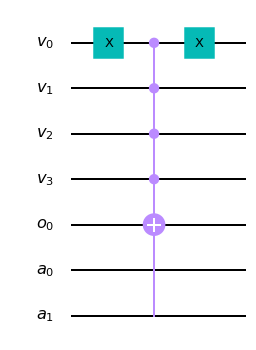

In [24]:
# Construct the circuit from the oracle
quantum_circuit = oracle.construct_circuit()
quantum_circuit.draw()


In [25]:
# Generate a quantum instance from a simulator
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024)


In [26]:
# Create the Grover algorithm with the Logical Expression Oracle
grover = Grover(oracle)


Top result: 1110


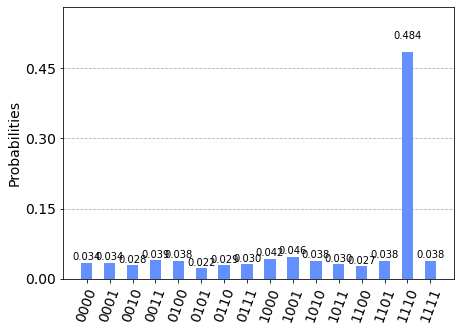

In [27]:
# Run the Grover algorithm 
result = grover.run(quantum_instance)

# Print the top measured result
print('Top result:', result['top_measurement'])
# Plot all measured results
plot_histogram(result['measurement'])


In [28]:
# Create the Truth Table expression for constant
truth_table = '1111'

# Create the Truth Table Oracle from the expression
constant_oracle = TruthTableOracle(truth_table)


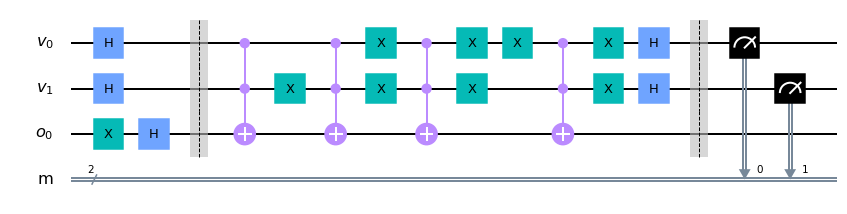

In [29]:
# Create Deutsch-Jozsa algorithm
dj = DeutschJozsa(oracle=constant_oracle, quantum_instance=quantum_instance)
# Construct the circuit and draw the result
dj_circuit = dj.construct_circuit(measurement=True)
dj_circuit.draw()


In [30]:
# Run the algorithm on the quantum instance
results = dj.run(quantum_instance)
# Print the results that determines constant or balanced
print(results)


{'measurement': {'00': 1024}, 'result': 'constant'}


In [31]:
# Create the expression for secret value s: 
# (This ties x1=01, x2=10 XOR with s=11)
s = '0110'

# Create the Truth Table Oracle from the expression
oracle_simon = TruthTableOracle(s) 


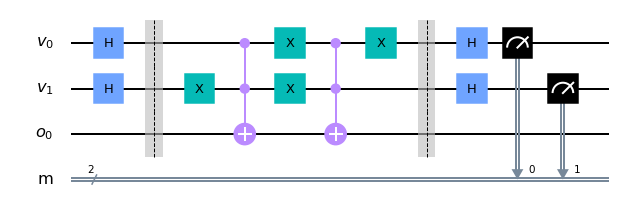

In [32]:
# Create Simon algorithm
simon = Simon(oracle=oracle_simon, quantum_instance=quantum_instance)
simon_circuit = simon.construct_circuit(measurement=True)
simon_circuit.draw()


In [33]:
# Run the Simon algorithm to determine s, 
# where x1 XOR s = x2
results = simon.run(quantum_instance)
print('Secret string s = ', results['result'])


Secret string s =  11
